<a href="https://colab.research.google.com/github/rafaelmm82/ml-things/blob/main/small-things/embeddings/embeddings-calmcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Embeddings - Calmcode

codes from Calmcode embeddings contents

https://calmcode.io/embeddings/introduction.html

In [1]:
# Download dataset
!wget https://calmcode.io/datasets/headlines.zip

--2023-08-04 16:20:57--  https://calmcode.io/datasets/headlines.zip
Resolving calmcode.io (calmcode.io)... 104.17.186.66, 104.17.185.66, 2606:4700::6811:ba42, ...
Connecting to calmcode.io (calmcode.io)|104.17.186.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1569647 (1.5M) [application/zip]
Saving to: ‘headlines.zip’

headlines.zip       100%[===================>]   1.50M  1.43MB/s    in 1.0s    

2023-08-04 16:20:59 (1.43 MB/s) - ‘headlines.zip’ saved [1569647/1569647]



In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import itertools as it

In [3]:
# Read data
words = pd.read_csv('/content/headlines.zip').loc[lambda d: ~d['text'].isna()]['text'][:20_000]

In [4]:
words.head()

0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
Name: text, dtype: object

In [5]:
# defining sliding windows function

def sliding_window(txt):
  for i in range(len(txt) - 1):
    txt = txt.replace(" ", "_")
    yield txt[i], txt[i + 1]


In [6]:
# Make sliding window

window = list(it.chain(*[sliding_window(_) for _ in words]))
mapping = {c: i for i, c in enumerate(pd.DataFrame(window)[0].unique())}

In [7]:
# Training data
integers_in = np.array([mapping[w[0]] for w in window])
integers_out = np.array([mapping[w[1]] for w in window]).reshape(-1, 1)

In [18]:
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [12]:
num_letters = len(mapping)

# this on is so we might grab the embeddings
model_emb = Sequential()
embedding = Embedding(num_letters, 2, input_length=1)
model_emb.add(embedding)

In [16]:
idx_to_calc = list(mapping.values())
idx_to_calc = np.array([idx_to_calc]).T

{v:k for k,v in mapping.items()}
idx_to_calc = list(mapping.values())
idx_to_calc = np.array([idx_to_calc]).T

translator = {v:k for k,v in mapping.items()}
# Generate the 2d embeddings on an untrained network
preds = model_emb.predict(idx_to_calc)

2/2 [==============================] - 0s 5ms/step


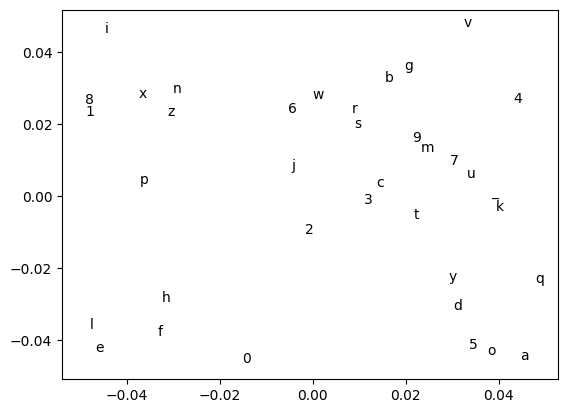

In [19]:
# Plot the 2d embeddings of each letter

plt.scatter(preds[:, 0, 0], preds[:, 0, 1], alpha=0)
for i, idx in enumerate(idx_to_calc):
  plt.text(preds[i, 0, 0], preds[i, 0, 1], translator[idx[0]])


In [20]:
from tensorflow.keras.optimizers import Adam

# this one is so we might learn the mapping

model_pred = Sequential()
model_pred.add(embedding)
model_pred.add(Flatten())
model_pred.add(Dense(num_letters, activation="softmax"))

adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [21]:
model_pred.compile(adam, 'categorical_crossentropy', metrics=['accuracy'])

In [22]:
from sklearn.preprocessing import OneHotEncoder

to_predict = OneHotEncoder(sparse=False).fit_transform(integers_out)
model_pred.fit(integers_in, to_predict, epochs=1, verbose=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


23907/23907 [==============================] - 45s 2ms/step - loss: 2.7199 - accuracy: 0.1893


2/2 [==============================] - 0s 3ms/step


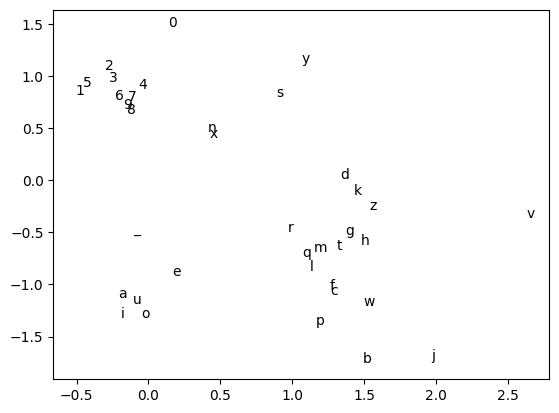

In [24]:
preds = model_emb.predict(idx_to_calc)
plt.scatter(preds[:, 0, 0], preds[:, 0, 1], alpha=0)
for i, idx in enumerate(idx_to_calc):
    plt.text(preds[i, 0, 0], preds[i, 0, 1], translator[idx[0]])